<a href="https://colab.research.google.com/github/Ranjankumar666/AgarIoClone/blob/master/Mask_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [35]:
! kaggle datasets download -d ahemateja19bec1025/facemask-dataset

 97% 49.0M/50.4M [00:01<00:00, 21.3MB/s]
100% 50.4M/50.4M [00:01<00:00, 27.6MB/s]


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! unzip /content/face-mask-detection.zip

Archive:  /content/face-mask-detection.zip
  inflating: annotations/maksssksksss0.xml  
  inflating: annotations/maksssksksss1.xml  
  inflating: annotations/maksssksksss10.xml  
  inflating: annotations/maksssksksss100.xml  
  inflating: annotations/maksssksksss101.xml  
  inflating: annotations/maksssksksss102.xml  
  inflating: annotations/maksssksksss103.xml  
  inflating: annotations/maksssksksss104.xml  
  inflating: annotations/maksssksksss105.xml  
  inflating: annotations/maksssksksss106.xml  
  inflating: annotations/maksssksksss107.xml  
  inflating: annotations/maksssksksss108.xml  
  inflating: annotations/maksssksksss109.xml  
  inflating: annotations/maksssksksss11.xml  
  inflating: annotations/maksssksksss110.xml  
  inflating: annotations/maksssksksss111.xml  
  inflating: annotations/maksssksksss112.xml  
  inflating: annotations/maksssksksss113.xml  
  inflating: annotations/maksssksksss114.xml  
  inflating: annotations/maksssksksss115.xml  
  inflating: annotation

In [36]:
! unzip /content/facemask-dataset.zip

Archive:  /content/facemask-dataset.zip
  inflating: dataset/dataset/0/0.jpg  
  inflating: dataset/dataset/0/1.jpg  
  inflating: dataset/dataset/0/10.jpg  
  inflating: dataset/dataset/0/100.jpg  
  inflating: dataset/dataset/0/101.jpg  
  inflating: dataset/dataset/0/102.jpg  
  inflating: dataset/dataset/0/104.jpg  
  inflating: dataset/dataset/0/105.jpg  
  inflating: dataset/dataset/0/106.jpg  
  inflating: dataset/dataset/0/107.jpg  
  inflating: dataset/dataset/0/108.jpg  
  inflating: dataset/dataset/0/109.jpg  
  inflating: dataset/dataset/0/11.jpg  
  inflating: dataset/dataset/0/110.jpg  
  inflating: dataset/dataset/0/111.jpg  
  inflating: dataset/dataset/0/112.jpg  
  inflating: dataset/dataset/0/114.jpg  
  inflating: dataset/dataset/0/115.jpg  
  inflating: dataset/dataset/0/116.jpg  
  inflating: dataset/dataset/0/117.jpg  
  inflating: dataset/dataset/0/118.jpg  
  inflating: dataset/dataset/0/119.jpg  
  inflating: dataset/dataset/0/12.jpg  
  inflating: dataset/dat

In [38]:
! rm -rf ./images

In [40]:
! rm -rf ./annotations

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [17]:
import os
import random 
def choose_rand_img(path):
    dir_files = os.listdir(path)
    selection = random.choice(dir_files)
    img = plt.imread(f'{path}/{selection}')
    plt.imshow(img)
    print(f"shape: {img.shape}")

    return img

shape: (428, 320, 3)


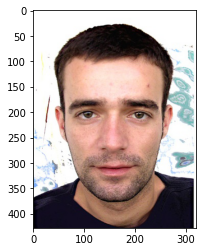

In [41]:
img = choose_rand_img('/content/dataset/dataset/0')

shape: (350, 622, 3)


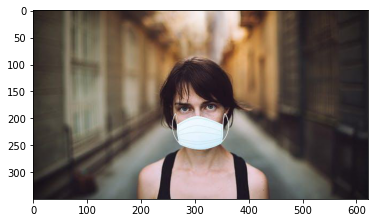

In [42]:
img = choose_rand_img('/content/dataset/dataset/1')

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_size= (224, 224)
batch_size=32
seed=42
data_path = '/content/dataset/dataset/'

data_gen = ImageDataGenerator(rescale=1./255,  validation_split=0.3)

train_data = data_gen.flow_from_directory(directory=data_path,target_size=img_size, batch_size=batch_size, subset='training', seed=42, class_mode='binary'  ) 
test_data = data_gen.flow_from_directory(directory=data_path,target_size=img_size, batch_size=batch_size, subset='validation', seed=42, class_mode='binary' ) 


Found 964 images belonging to 2 classes.
Found 412 images belonging to 2 classes.


In [48]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
      tf.keras.layers.Conv2D(10, 3, input_shape=(224, 224, 3), activation='relu'),
      tf.keras.layers.Conv2D(10, 3,  activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
      tf.keras.layers.Conv2D(10, 3,  activation='relu'),
      tf.keras.layers.Conv2D(10, 3,  activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1, 'sigmoid')
])

model1.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='Adam')

model1.fit(train_data,epochs=5,  steps_per_epoch=len(train_data), validation_data=test_data,  validation_steps=len(test_data) )

Epoch 1/5
31/31 [==============================] - 21s 224ms/step - loss: 0.3784 - accuracy: 0.8195 - val_loss: 0.1402 - val_accuracy: 0.9515
Epoch 2/5
31/31 [==============================] - 7s 211ms/step - loss: 0.1300 - accuracy: 0.9606 - val_loss: 0.1313 - val_accuracy: 0.9636
Epoch 3/5
31/31 [==============================] - 6s 210ms/step - loss: 0.0982 - accuracy: 0.9668 - val_loss: 0.1038 - val_accuracy: 0.9733
Epoch 4/5
31/31 [==============================] - 6s 210ms/step - loss: 0.0506 - accuracy: 0.9813 - val_loss: 0.1871 - val_accuracy: 0.9466
Epoch 5/5
31/31 [==============================] - 6s 203ms/step - loss: 0.0641 - accuracy: 0.9793 - val_loss: 0.1014 - val_accuracy: 0.9757


In [58]:
img = (plt.imread('/content/IMG_20220203_232532.jpg'))
img = tf.keras.preprocessing.image.smart_resize(img, img_size).shape

model1.predict([img])

ValueError: ignored